In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv('rice_data.csv')
print(df.shape)
df.head() 

(10000, 9)


,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Rice,Autumn,Dhaka,607358.0,398311,2051.4,5.780226e+07,188280.98,0.780870
1,Rice,Summer,Dhaka,174974.0,209623,2051.4,1.665228e+07,54241.94,1.060435
2,Rice,Winter,Dhaka,1743321.0,1647296,2051.4,1.659119e+08,540429.51,0.941304
3,Rice,Monsoon,Chittagong,1031530.0,2340493,1266.7,9.817071e+07,319774.30,2.233500
4,Rice,Winter,Chittagong,53889.0,109350,1266.7,5.128616e+06,16705.59,2.073846


In [12]:
print(f"Missisng value in each column: ",df.isnull().sum())

print(f"Statistical summary:",df.describe())

print(f"Data type of coloumn: ",df.dtypes)

print(f"Number of duplicate row: ", df.duplicated().sum())

Missisng value in each column:  Crop               0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64
Statistical summary:                Area    Production  Annual_Rainfall    Fertilizer  \
count  1.000000e+04  1.000000e+04     10000.000000  1.000000e+04   
mean   8.059191e+05  1.817894e+06      1218.394194  1.065234e+08   
std    1.246921e+06  2.920696e+06       991.990776  1.747822e+08   
min    7.000000e+00  6.000000e+00     -1182.000000 -7.415854e+06   
25%    3.309900e+04  7.848900e+04       551.700000  2.723171e+06   
50%    2.126800e+05  4.559320e+05       994.700000  2.691691e+07   
75%    1.185381e+06  2.625100e+06      1652.800000  1.441178e+08   
max    8.629000e+06  1.694800e+07      6552.700000  1.301253e+09   

          Pesticide         Yield  
count  1.000000e+04  10000.000000  
mean   2.108186e+05      2.295527  
std    3.513684e+05     

In [16]:
df= df.drop(columns=['Crop','Season','State'])
print(df)
df.head()

           Area  Production  Annual_Rainfall    Fertilizer  Pesticide  \
0      607358.0      398311           2051.4  5.780226e+07  188280.98   
1      174974.0      209623           2051.4  1.665228e+07   54241.94   
2     1743321.0     1647296           2051.4  1.659119e+08  540429.51   
3     1031530.0     2340493           1266.7  9.817071e+07  319774.30   
4       53889.0      109350           1266.7  5.128616e+06   16705.59   
...         ...         ...              ...           ...        ...   
9995   100824.0      285614           2655.4  1.156806e+07   18222.48   
9996  2812400.0     7005800            248.3  2.738651e+08  803596.00   
9997  1880737.0     3709081           1397.7  2.697477e+08  501798.99   
9998    52985.0      128945           2528.8  4.766714e+06    5656.70   
9999  3828992.0     5567644            843.7  3.749936e+08  906958.08   

         Yield  
0     0.780870  
1     1.060435  
2     0.941304  
3     2.233500  
4     2.073846  
...        ...  
9995

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,607358.0,398311,2051.4,5.780226e+07,188280.98,0.780870
1,174974.0,209623,2051.4,1.665228e+07,54241.94,1.060435
2,1743321.0,1647296,2051.4,1.659119e+08,540429.51,0.941304
3,1031530.0,2340493,1266.7,9.817071e+07,319774.30,2.233500
4,53889.0,109350,1266.7,5.128616e+06,16705.59,2.073846


<function matplotlib.pyplot.show(close=None, block=None)>

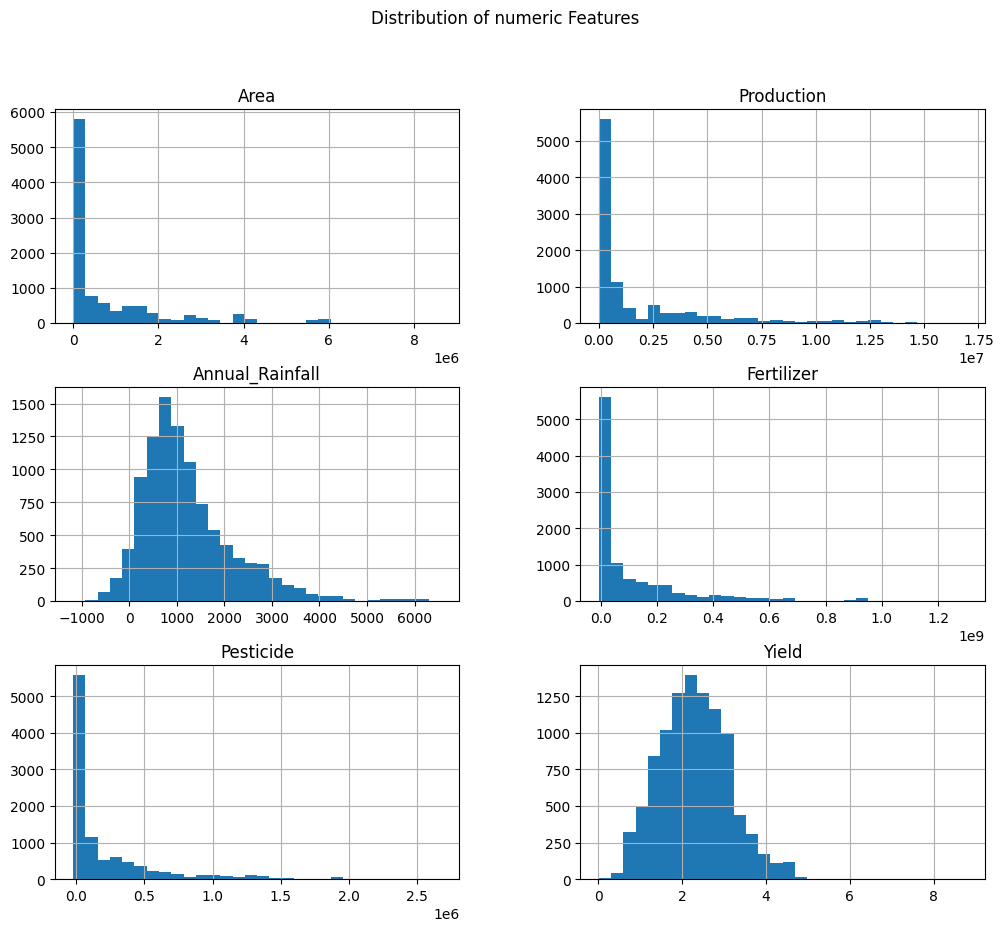

In [13]:
df.hist(figsize=(12, 10),bins=30)
plt. suptitle('Distribution of numeric Features')
plt.show

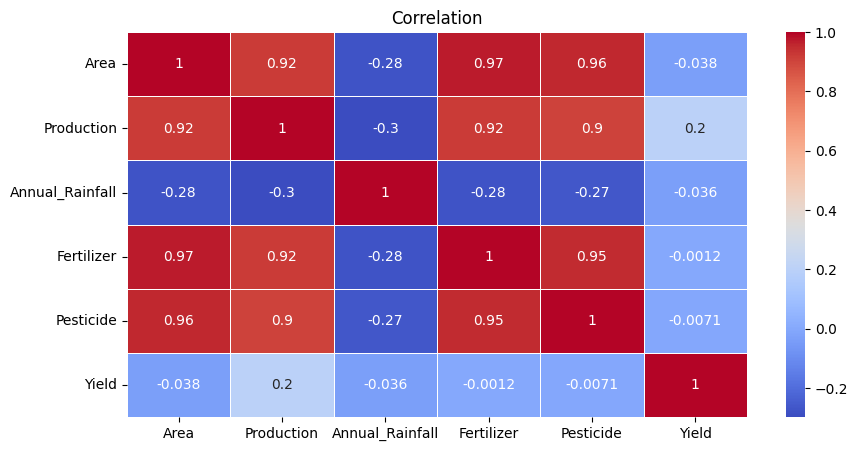

In [17]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation')
plt.show()


In [18]:
X = df.drop(columns=['Yield'])
Y = df['Yield']
print(f"x data head", X.head())
print(f"y data head", Y.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 40)

x data head         Area  Production  Annual_Rainfall    Fertilizer  Pesticide
0   607358.0      398311           2051.4  5.780226e+07  188280.98
1   174974.0      209623           2051.4  1.665228e+07   54241.94
2  1743321.0     1647296           2051.4  1.659119e+08  540429.51
3  1031530.0     2340493           1266.7  9.817071e+07  319774.30
4    53889.0      109350           1266.7  5.128616e+06   16705.59
y data head 0    0.780870
1    1.060435
2    0.941304
3    2.233500
4    2.073846
Name: Yield, dtype: float64


Mean Squared Error of Linear Regression:  0.4619998281981817
R-sequared Score of Linear Regression :  34.44396381863817


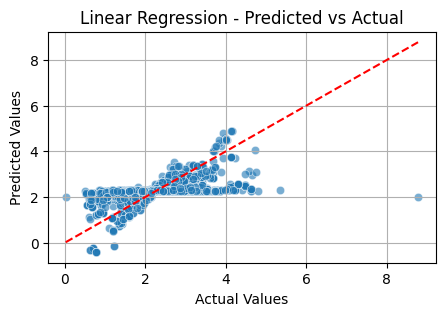

Mean Squared Error of Random Forest:  0.039132642904837325
R-sequared Score of Random Forest :  94.44722530710257


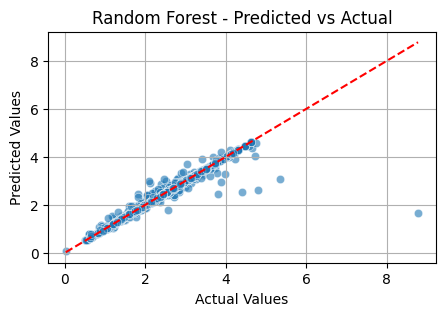

Mean Squared Error of Decision tree:  0.04544208327758862
R-sequared Score of Decision tree :  93.55193947339701


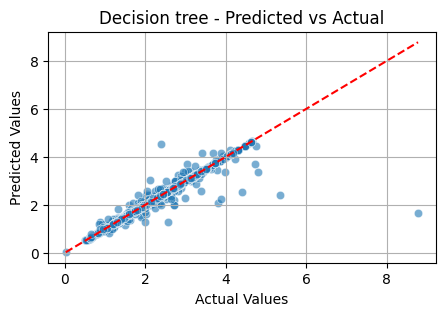

In [49]:
from sklearn.linear_model import LinearRegression
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest":RandomForestRegressor(n_estimators = 100, random_state = 40),
    "Decision tree":DecisionTreeRegressor()
}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)*100

    print(f"Mean Squared Error of {name}: {mse: }")
    print(f"R-sequared Score of {name} : {r2: }")

    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.6)
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{name} - Predicted vs Actual")
    plt.grid(True)
    plt.show()

In [42]:
feature_importances = model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: Area, Importance: 0.4666
Feature: Production, Importance: 0.4675
Feature: Annual_Rainfall, Importance: 0.0095
Feature: Fertilizer, Importance: 0.0464
Feature: Pesticide, Importance: 0.0099


               Model       MSE   R2 Score
0  Linear Regression  0.462000  34.443964
1      Random Forest  0.039133  94.447225
2      Decision tree  0.044419  93.697093


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16536\1599445982.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16536\1599445982.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=results_df, palette='coolwarm')


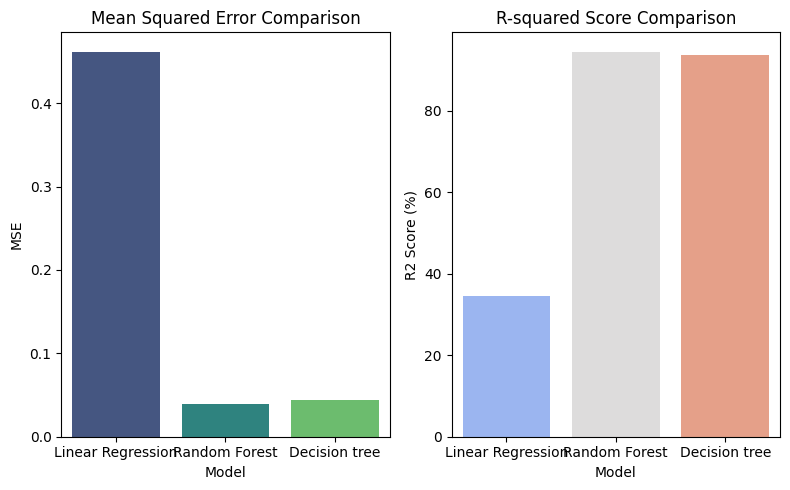

In [53]:

results = {"Model": [], "MSE": [], "R2 Score": []}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    results["Model"].append(name)
    results["MSE"].append(mse)
    results["R2 Score"].append(r2 * 100) 

results_df = pd.DataFrame(results)
print(results_df)

plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
plt.title('Mean Squared Error Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=results_df, palette='coolwarm')
plt.title('R-squared Score Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score (%)')

plt.tight_layout()
plt.show()
